In [130]:
from matplotlib import pyplot as plt
import numpy as np
plt.style.use('dark_background')

def find_root(f, df=None, start=0):
    # define the derivative of f if not specified
    if(df is None):
        def df(x, h=1e-6):
            return (f(x+h) - f(x)) / h

            
    # calculate the values using the function from the course
    calc_values = []
    x = start
    while x not in calc_values:
        calc_values.append(x)
        x = x - (f(x) / df(x))

        #exit clause for function where there is no root
        if(len(calc_values) >= 10**4):
            return x
    return calc_values[-1]


def solve_keppler(keppler, t):
    def k(psi):
        return keppler(psi) - t
    return(find_root(k))





/var/folders/63/kr3r0_q93cs_34zrsvflw69r0000gn/T/ipykernel_60642/2328037.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  x = x - (f(x) / df(x))
/var/folders/63/kr3r0_q93cs_34zrsvflw69r0000gn/T/ipykernel_60642/3419511642.py:7: RuntimeWarning: invalid value encountered in sin
  return psi - e * np.sin(psi)


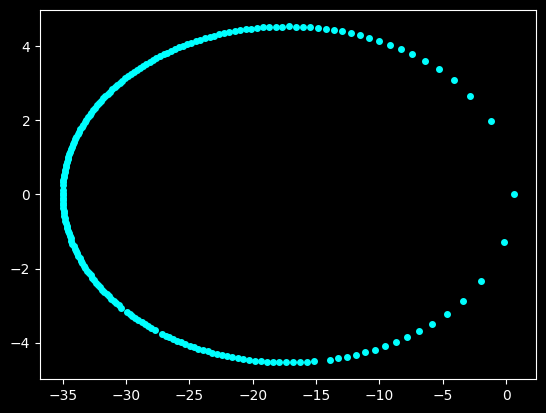

In [ ]:
# Haleys Comet
a = 17.8
e = 0.967
time = np.arange(0, 2*np.pi, 0.03333333333)

def hayley_keppler(psi):
    return psi - e * np.sin(psi)

def hayley_x(psi):
    return a * (np.cos(psi) - e)
def hayley_y(psi):
    return a * np.sqrt(1 - e**2) * np.sin(psi)

psi_values = [solve_keppler(hayley_keppler, t) for t in time]
x_values = [hayley_x(psi) for psi in psi_values]
y_values = [hayley_y(psi) for psi in psi_values]
plt.plot(x_values, y_values, color='cyan', marker='.', markersize=8, linewidth=0)


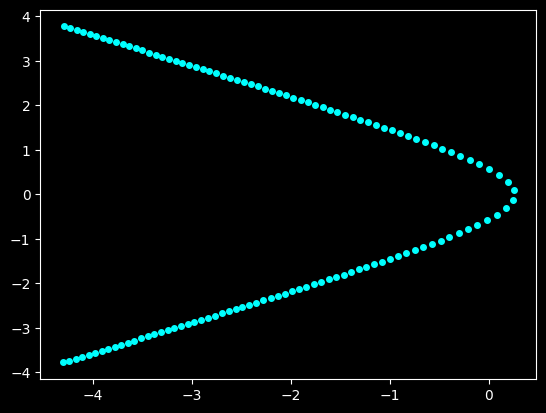

In [132]:
# Oumuamua
a = 1.28
e = 1.20
time = np.arange(-np.pi, np.pi, 0.051)

def o_keppler(psi):
    return e * np.sinh(psi) - psi

def ox(psi):
    return a * (e - np.cosh(psi))
def oy(psi):
    return a * np.sqrt(e**2 - 1) * np.sinh(psi)

psi_values = [solve_keppler(o_keppler, t) for t in time]
x_values = [ox(psi) for psi in psi_values]
y_values = [oy(psi) for psi in psi_values]



plt.plot(x_values, y_values, color='cyan', marker='.', markersize=8, linewidth=0)